# Run wind farm simulation

In [1]:
# Install PyWake if needed
try:
    import py_wake
except ModuleNotFoundError:
    !pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake.git

In [2]:
# import and setup site and windTurbines
import numpy as np
import matplotlib.pyplot as plt
from py_wake.examples.data.iea37 import IEA37Site, IEA37_WindTurbines
from py_wake import IEA37SimpleBastankhahGaussian

site = IEA37Site(16)
x, y = site.initial_position.T
windTurbines = IEA37_WindTurbines()

wf_model = IEA37SimpleBastankhahGaussian(site, windTurbines)

print(wf_model)

IEA37SimpleBastankhahGaussian(PropagateDownwind, IEA37SimpleBastankhahGaussianDeficit-wake, RotorCenter-rotor-average, SquaredSum-superposition)


Run the wind farm simulation by calling the wind farm model. The this call will return a `SimulationResult`

In [3]:
# run wind farm simulation
sim_res = wf_model(x, y, # wind turbine positions
                   h=None, # wind turbine heights (defaults to the heights defined in windTurbines)
                   type=0, # Wind turbine types
                   wd=None, # Wind direction (defaults to site.default_wd (0,1,...,360 if not overriden))
                   ws=None, # Wind speed (defaults to site.default_ws (3,4,...,25m/s if not overriden))
                   yaw_ilk=None # yaw misalignment [deg] for all wind turbines(i), wind directions(l) and wind speeds(k)
                  )

## SimulationResult

A `SimulationResult` is a xarray dataset with some additional methods and attributes. 
It has the coordinates

- `wt`: Wind turbine number
- `wd`: Ambient reference wind direction
- `ws`: Ambient reference wind speed
- `x`,`y`,`h`: position and hub height of wind turbines

and data variables:

- `WD`: Local free-stream wind direction
- `WS`: Local free-stream wind speed
- `TI`: Local free-stream turbulence intensity
- `P`: Probability of flow case (wind direction and wind speed)
- `WS_eff`: Effetive local wind speed [m/s]
- `TI_eff`: Effective local turbulence intensity
- `power`: Effective power production [W]
- `ct`: Thrust coefficient
- `Yaw`: Yaw misalignment [deg]

where "effective" means "including wake effects"
 

In [4]:
sim_res

<xarray.SimulationResult>
Dimensions:  (wd: 360, ws: 1, wt: 16)
Coordinates:
  * wt       (wt) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
  * wd       (wd) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * ws       (ws) float64 9.8
    x        (wt) float64 0.0 650.0 200.9 -525.9 ... -401.7 401.7 1.052e+03
    y        (wt) float64 0.0 0.0 618.2 382.1 ... -1.236e+03 -1.236e+03 -764.1
    h        (wt) float64 110.0 110.0 110.0 110.0 ... 110.0 110.0 110.0 110.0
    type     (wt) int32 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
Data variables:
    WS_eff   (wt, wd, ws) float64 9.776 9.761 9.738 9.704 ... 9.049 8.888 8.775
    TI_eff   (wt, wd, ws) float64 0.075 0.075 0.075 0.075 ... 0.075 0.075 0.075
    Power    (wt, wd, ws) float64 3.309e+06 3.284e+06 ... 2.005e+06 1.869e+06
    CT       (wt, wd, ws) float64 0.8889 0.8889 0.8889 ... 0.8889 0.8889 0.8889
    P        (wd) float64 0.001111 0.001111 0.001111 ... 0.001111 0.001111
    WD       (wd) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
    WS       (ws) float64 9.8
    TI       float64 0.075
    Yaw      (wt, wd, ws) int32 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0

Data can be selected using the xarray `sel` method, e.g. the power production of wind turbine 3 when the wind is coming from the East (90deg) is 2.634MW:

In [5]:
sim_res.Power.sel(wt=3, wd=0)

<xarray.DataArray 'Power' (ws: 1)>
array([2624293.287983])
Coordinates:
    wt       int32 3
    wd       int32 0
  * ws       (ws) float64 9.8
    x        float64 -525.9
    y        float64 382.1
    h        float64 110.0
    type     int32 0
Attributes:
    Description:  Power [W]

Data can be plotted using the xarray `plot` method, e.g. the power production of wind turbine 0 as a function of wind direction

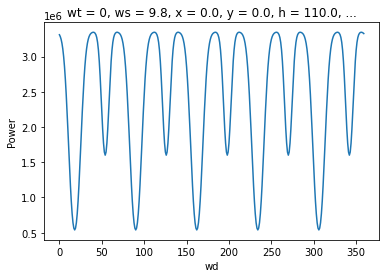

In [6]:
sim_res.Power.sel(wt=0).plot()

### AEP calculation

Furthermore, `SimulationResult`, contains a method, `aep` that calculates the Annual Energy Production

In [7]:
sim_res.aep()

<xarray.DataArray 'AEP' (wt: 16, wd: 360, ws: 1)>
array([[[0.03221141],
        [0.03195991],
        [0.03157906],
        ...,
        [0.03252982],
        [0.03247122],
        [0.03237201]],

       [[0.03225682],
        [0.03244372],
        [0.03253571],
        ...,
        [0.03030697],
        [0.03129127],
        [0.0319047 ]],

       [[0.03221142],
        [0.03195991],
        [0.03157907],
        ...,
        [0.03253074],
        [0.03247129],
        [0.03237202]],

       ...,

       [[0.01997264],
        [0.02201536],
        [0.02419425],
        ...,
        [0.01386263],
        [0.01589217],
        [0.01796251]],

       [[0.02331829],
        [0.02392321],
        [0.02516424],
        ...,
        [0.022921  ],
        [0.02341593],
        [0.02331792]],

       [[0.01773565],
        [0.01819481],
        [0.01951149],
        ...,
        [0.02150479],
        [0.01951311],
        [0.01819518]]])
Coordinates:
  * wt       (wt) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
  * wd       (wd) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * ws       (ws) float64 9.8
    x        (wt) float64 0.0 650.0 200.9 -525.9 ... -401.7 401.7 1.052e+03
    y        (wt) float64 0.0 0.0 618.2 382.1 ... -1.236e+03 -1.236e+03 -764.1
    h        (wt) float64 110.0 110.0 110.0 110.0 ... 110.0 110.0 110.0 110.0
    type     (wt) int32 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
Attributes:
    Description:  Annual energy production [GWh]

The total wind farm AEP is obtained using the `sum` method

In [8]:
sim_res.aep().sum()

<xarray.DataArray 'AEP' ()>
array(373.20664521)

The `aep` method take an optional input, `with_wake_loss` (default is True), which can be used to e.g. calculate the wake loss of the wind farm

In [9]:
aep_with_wake_loss = sim_res.aep().sum().data
aep_witout_wake_loss = sim_res.aep(with_wake_loss=False).sum().data
(aep_witout_wake_loss-aep_with_wake_loss) / aep_witout_wake_loss

0.20741308303216552

## Flow map

Finally, `SimulationResult` has a `flow_map` method which returns a `FlowMap` object

In [10]:
flow_map = sim_res.flow_map(grid=None, # defaults to HorizontalGrid(resolution=500, extend=0.2), see below
                            wd=270, 
                            ws=None)

### plot_wake_map

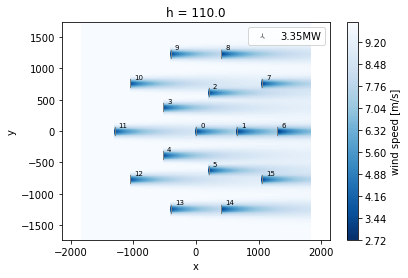

In [11]:
flow_map.plot_wake_map()

(-1823.6472945891783,
 1823.6472945891783,
 -1734.3916833667336,
 1734.3916833667336)

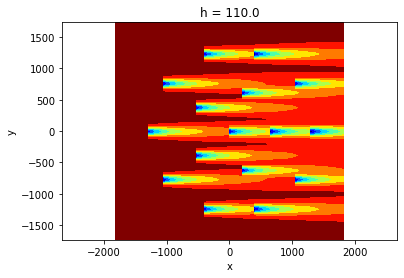

In [12]:
flow_map.plot_wake_map(levels=10, # contourf levels (int or list of levels)
                       cmap='jet', # color map
                       plot_colorbar=False, 
                       plot_windturbines=False, 
                       ax=None)
plt.axis('equal')

#### Grid

The grid argument should be either 

- a `HorizontalGrid`(same as `XYGrid`), `YZGrid` or 
- a tuple(X, Y, x, y, h) where X, Y is the meshgrid for visualizing the data and x, y, h are the flattened grid points

 
##### HorizontalGrid (XYGrid)


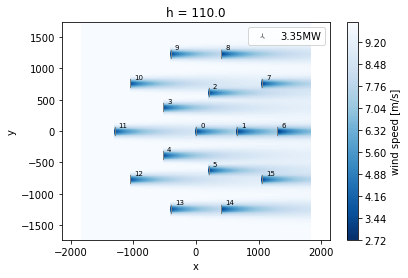

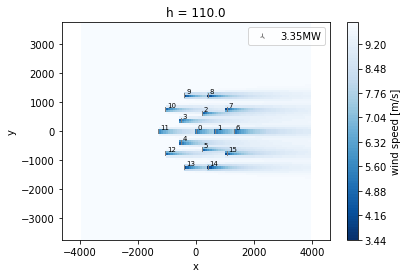

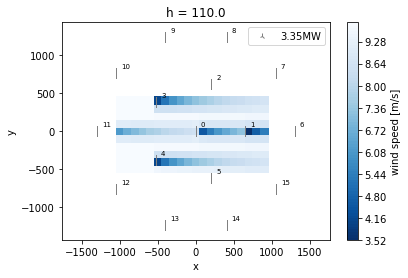

In [13]:
from py_wake import HorizontalGrid
for grid in [None, # defaults to HorizontalGrid(resolution=500, extend=0.2)
             HorizontalGrid(x=None, y=None, resolution=100, extend=1), # custom resolution and extend
             HorizontalGrid(x = np.arange(-1000,1000,100),
                            y = np.arange(-500,500,100)) # custom x and y
            ]:
    plt.figure()
    sim_res.flow_map(grid=grid, wd=270, ws=None).plot_wake_map()

##### YZGrid
Vertical grid in the YZ plane

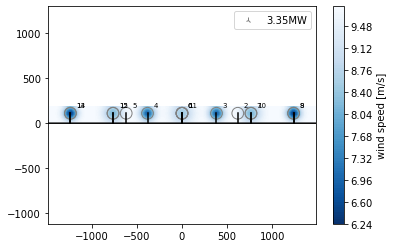

In [14]:
from py_wake import YZGrid
for grid in [YZGrid(x=-100, y=None, resolution=100, extend=.1), # custom resolution and extend
             ]:
    plt.figure()
    sim_res.flow_map(grid=grid, wd=270, ws=None).plot_wake_map()